**Video Game Sales and Engagement Analysist**

In [7]:
import pandas as pd
games = pd.read_csv('/content/drive/MyDrive/GUVI_PROJECT2/games.csv')
sales = pd.read_csv('/content/drive/MyDrive/GUVI_PROJECT2/vgsales.csv')


In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [9]:
games.isnull().sum()

,0
Unnamed: 0,0
Title,0
Release Date,0
Team,1
Rating,13
Times Listed,0
Number of Reviews,0
Genres,0
Summary,1
Reviews,0


In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [11]:
sales.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [12]:
games.drop_duplicates(inplace=True)

In [13]:
sales.drop_duplicates(inplace=True)

In [14]:
games.shape

(1512, 14)

In [15]:
sales.shape

(16598, 11)

In [16]:
games.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [17]:
sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

sales null values fill(year,publisher)

In [18]:
# Fill with median year
median_year = int(sales['Year'].median())
sales['Year'].fillna(median_year, inplace=True)

#Fill with publisher
sales['Publisher'].fillna('Unknown Publisher', inplace=True)

<ipython-input-18-33cc4426021d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['Year'].fillna(median_year, inplace=True)
<ipython-input-18-33cc4426021d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

games null values fill(team,rating,summary)

In [19]:
#Fill with team placeholder
games['Team'].fillna("Unknown Team", inplace=True)
#Fill with mean rating
avg_rating = games['Rating'].mean()
games['Rating'].fillna(avg_rating, inplace=True)
#Fill with placeholder
games['Summary'].fillna("No summary available", inplace=True)

<ipython-input-19-1ad21a055cb9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Team'].fillna("Unknown Team", inplace=True)
<ipython-input-19-1ad21a055cb9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [20]:
# Convert release date to datetime format
games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')
games['Release Year'] = games['Release Date'].dt.year


In [21]:
games['Rating'] = pd.to_numeric(games['Rating'], errors='coerce')


In [22]:
# Normalize column names
games.columns = [col.strip().lower().replace(" ", "_") for col in games.columns]
sales.columns = [col.strip().lower().replace(" ", "_") for col in sales.columns]


In [23]:
games.isnull().sum()

,0
unnamed:_0,0
title,0
release_date,3
team,0
rating,0
times_listed,0
number_of_reviews,0
genres,0
summary,0
reviews,0


In [24]:
# Fill with a fixed placeholder date (safe for dashboards)
games['release_date'].fillna(pd.Timestamp("2000-01-01"), inplace=True)

# Recalculate release year
games['release_year'] = games['release_date'].dt.year


<ipython-input-24-ef005705d2aa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['release_date'].fillna(pd.Timestamp("2000-01-01"), inplace=True)


In [25]:
games.isnull().sum()

,0
unnamed:_0,0
title,0
release_date,0
team,0
rating,0
times_listed,0
number_of_reviews,0
genres,0
summary,0
reviews,0


In [26]:
games.head(2)

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist,release_year
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K,2022
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K,2019


In [27]:
# Clean Team column
games['team'] = games['team'].astype(str)  #  string type
games['team'] = games['team'].str.replace("[\[\]']", "", regex=True)

In [28]:
# Clean reviews and genres column
games['reviews'] = games['reviews'].astype(str)
games['reviews'] = games['reviews'].str.replace(r"[\[\]']", "", regex=True)
games['genres'] = games['genres'].astype(str)
games['genres'] = games['genres'].str.replace(r"[\[\]']", "", regex=True)


In [29]:
games.head(2)

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist,release_year
0,0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3.9K,3.9K,"Adventure, RPG","Elden Ring is a fantasy, action and open world...","""The first playthrough of elden ring is one of...",17K,3.8K,4.6K,4.8K,2022
1,1,Hades,2019-12-10,Supergiant Games,4.3,2.9K,2.9K,"Adventure, Brawler, Indie, RPG",A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21K,3.2K,6.3K,3.6K,2019


In [30]:
sales.head(2)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [31]:
#save to clean data
games.to_csv("games_clean.csv", index=False)
sales.to_csv("sales_clean.csv",index=False)


In [32]:
# Standardize name fields for merging
games['title'] = games['title'].str.lower().str.strip()
sales['name'] = sales['name'].str.lower().str.strip()
merged = pd.merge(games, sales, left_on='title', right_on='name', how='inner')


In [33]:
print(merged.shape)
print(merged.columns)


(1384, 26)
Index(['unnamed:_0', 'title', 'release_date', 'team', 'rating', 'times_listed',
       'number_of_reviews', 'genres', 'summary', 'reviews', 'plays', 'playing',
       'backlogs', 'wishlist', 'release_year', 'rank', 'name', 'platform',
       'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'global_sales'],
      dtype='object')


In [34]:
merged.head(2)

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,...,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,5,minecraft,2011-11-18,Mojang Studios,4.3,2.3K,2.3K,"Adventure, Simulator",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it. Unfortunatel...,...,minecraft,X360,2013.0,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
1,5,minecraft,2011-11-18,Mojang Studios,4.3,2.3K,2.3K,"Adventure, Simulator",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it. Unfortunatel...,...,minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42


merged

In [35]:
merged.to_csv("merged_games_sales.csv", index=False)


**My SQLconnection
Install the mysql.connector library**

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 20.3 MB/s eta 0:00:00


**Install MySQL Server**

In [2]:
!apt update && apt install -y mysql-server

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,765 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,553 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu 

In [3]:
!sudo mysql -u root -p

Enter password: 
ERROR 2002 (HY000): Can't connect to local MySQL server through socket '/var/run/mysqld/mysqld.sock' (2)


In [4]:
import sqlite3
import pandas as pd
from datetime import datetime

# Load the dataset
games = pd.read_csv('/content/drive/MyDrive/GUVI_PROJECT2/games.csv')

# Print columns to verify structure
print("Original columns in games DataFrame:", games.columns)

# Step 1 & 2: Connect to the SQLite database (creates the database file if it doesn't exist)
conn = sqlite3.connect('vgdb.db')
cursor = conn.cursor()
print("Connected to SQLite database vgdb.db")

# Step 3: Create the 'games' table with proper schema
cursor.execute("DROP TABLE IF EXISTS games")
cursor.execute("""
    CREATE TABLE IF NOT EXISTS games (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        title VARCHAR(255),
        rating REAL,
        genres VARCHAR(255),
        plays INTEGER,
        backlogs INTEGER,
        wishlist INTEGER,
        release_date DATE,
        team VARCHAR(100)
    )
""")
print("Table 'games' created or recreated with updated schema.")

# Step 4: Clean and prepare data

# Select relevant columns
expected_columns = ['Title', 'Rating', 'Genres', 'Plays', 'Backlogs', 'Wishlist', 'Release Date', 'Team']
games = games[expected_columns]

# Rename columns to match SQL table schema
column_mapping = {
    'Title': 'title',
    'Rating': 'rating',
    'Genres': 'genres',
    'Plays': 'plays',
    'Backlogs': 'backlogs',
    'Wishlist': 'wishlist',
    'Release Date': 'release_date',
    'Team': 'team'
}
games = games.rename(columns=column_mapping)

# Convert release_date to datetime, coerce errors to NaT
games['release_date'] = pd.to_datetime(games['release_date'], errors='coerce')

# Convert plays to numeric and handle NaNs
games['plays'] = pd.to_numeric(games['plays'], errors='coerce').fillna(0).astype(int)

# Convert 'Backlogs' and 'Wishlist' values with K/M to numeric integers
def convert_k_m(value):
    if isinstance(value, str):
        value = value.strip()
        if value.upper().endswith('K'):
            return float(value[:-1]) * 1000
        elif value.upper().endswith('M'):
            return float(value[:-1]) * 1000000
    try:
        return float(value)
    except:
        return 0

games['backlogs'] = games['backlogs'].apply(convert_k_m).fillna(0).astype(int)
games['wishlist'] = games['wishlist'].apply(convert_k_m).fillna(0).astype(int)

# Step 5: Insert data into SQLite table
sql_columns_order = ['title', 'rating', 'genres', 'plays', 'backlogs', 'wishlist', 'release_date', 'team']
games_for_sql = games[sql_columns_order]

inserted_rows = 0

for _, row in games_for_sql.iterrows():
    row_tuple = tuple(
        r.date() if isinstance(r, pd.Timestamp) and not pd.isna(r) else (None if pd.isna(r) else r)
        for r in row
    )
    try:
        cursor.execute("""
            INSERT INTO games (title, rating, genres, plays, backlogs, wishlist, release_date, team)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        """, row_tuple)
        inserted_rows += 1
    except sqlite3.Error as err:
        print(f"Error inserting row: {row_tuple}")
        print(f"Error: {err}")
        conn.rollback()
        continue

conn.commit()
print(f"Inserted {inserted_rows} rows into the games table.")

# Cleanup
cursor.close()
conn.close()

Original columns in games DataFrame: Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')
Connected to SQLite database vgdb.db
Table 'games' created or recreated with updated schema.
Inserted 1512 rows into the games table.


In [5]:
# Load vgsales.csv
sales = pd.read_csv('/content/drive/MyDrive/GUVI_PROJECT2/vgsales.csv')

# Preview columns
print("Original columns in sales DataFrame:", sales.columns)

# Step 1: Connect to the same SQLite DB
conn = sqlite3.connect('vgdb.db')
cursor = conn.cursor()

# Step 2: Create sales table
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        platform TEXT,
        year INTEGER,
        genre TEXT,
        publisher TEXT,
        na_sales REAL,
        eu_sales REAL,
        jp_sales REAL,
        other_sales REAL,
        global_sales REAL
    )
""")
print("Table 'sales' created or recreated.")

# Step 3: Clean & prepare sales data
# Standardize column names
sales.columns = [col.strip().lower().replace(" ", "_") for col in sales.columns]

# Fill missing values
sales.fillna({
    'year': sales['year'].median(),
    'publisher': 'Unknown'
}, inplace=True)

# Reorder columns for SQL
sql_sales_order = ['name', 'platform', 'year', 'genre', 'publisher',
                   'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
sales = sales[sql_sales_order]

# Step 4: Insert into SQLite
inserted_rows = 0
for _, row in sales.iterrows():
    try:
        cursor.execute("""
            INSERT INTO sales (name, platform, year, genre, publisher,
                               na_sales, eu_sales, jp_sales, other_sales, global_sales)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, tuple(row))
        inserted_rows += 1
    except sqlite3.Error as err:
        print(f"Error inserting row: {row}")
        print(f"Error: {err}")
        conn.rollback()
        continue

conn.commit()
print(f"Inserted {inserted_rows} rows into the sales table.")

# Cleanup
cursor.close()
conn.close()


Original columns in sales DataFrame: Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
Table 'sales' created or recreated.
Inserted 16598 rows into the sales table.


In [6]:
# Reload cleaned games and sales data
conn = sqlite3.connect('vgdb.db')
games_df = pd.read_sql_query("SELECT * FROM games", conn)
sales_df = pd.read_sql_query("SELECT * FROM sales", conn)
conn.close()

# Merge on game title
merged = pd.merge(games_df, sales_df, left_on='title', right_on='name', how='inner')

# Drop duplicate name column
merged.drop(columns=['name'], inplace=True)

# Reconnect and create merged_data table
conn = sqlite3.connect('vgdb.db')
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS merged_data")
cursor.execute("""
    CREATE TABLE merged_data AS
    SELECT * FROM (
        SELECT
            g.id AS game_id,
            g.title, g.rating, g.genres, g.plays, g.backlogs, g.wishlist, g.release_date, g.team,
            s.platform, s.year, s.genre AS sales_genre, s.publisher,
            s.na_sales, s.eu_sales, s.jp_sales, s.other_sales, s.global_sales
        FROM games g
        INNER JOIN sales s ON g.title = s.name
    )
""")
print("Table 'merged_data' created with merged game and sales data.")

conn.commit()
cursor.close()
conn.close()


Table 'merged_data' created with merged game and sales data.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

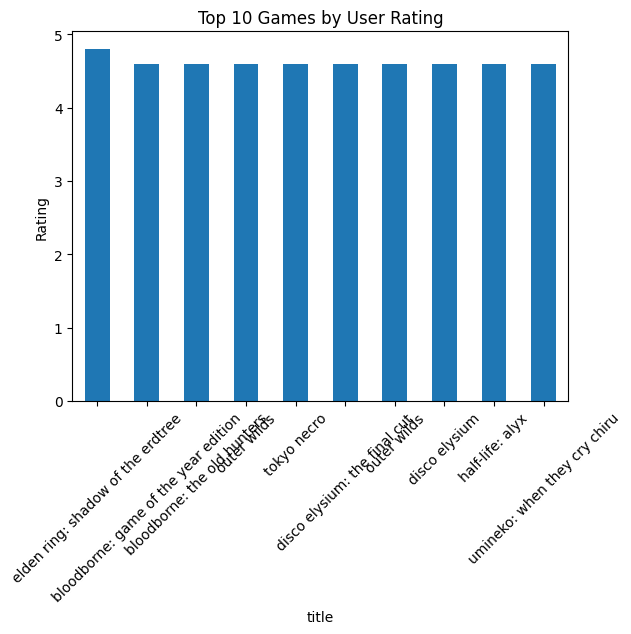

In [39]:
# 1. Top-rated games by user reviews
top_games = games[['title', 'rating']].sort_values('rating', ascending=False).head(10)
top_games.plot(kind='bar', x='title', y='rating', title='Top 10 Games by User Rating', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Rating')
plt.show()

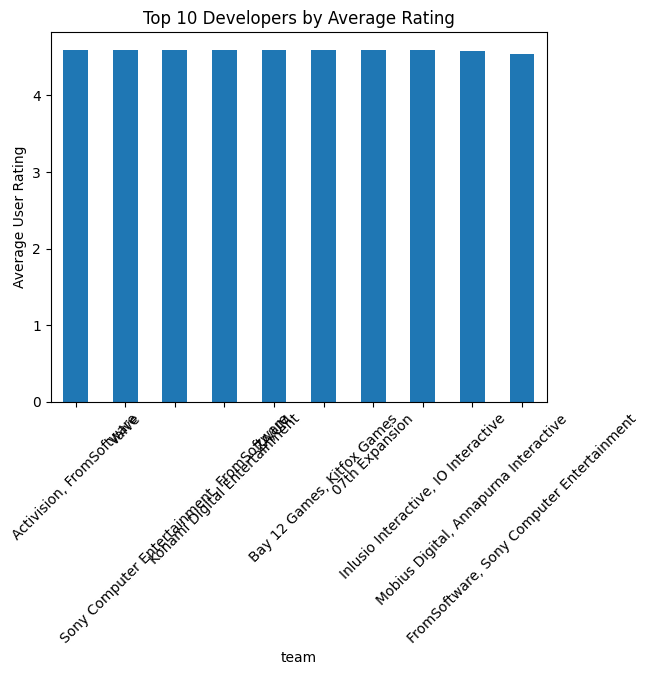

In [40]:
# 2. Developers with highest average ratings
dev_ratings = games.groupby('team')['rating'].mean().sort_values(ascending=False).head(10)
dev_ratings.plot(kind='bar', title='Top 10 Developers by Average Rating')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45)
plt.show()

🧩 Q3. Most common genres

<ipython-input-46-967feb25ba66>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q3.values, y=q3.index, palette='coolwarm')


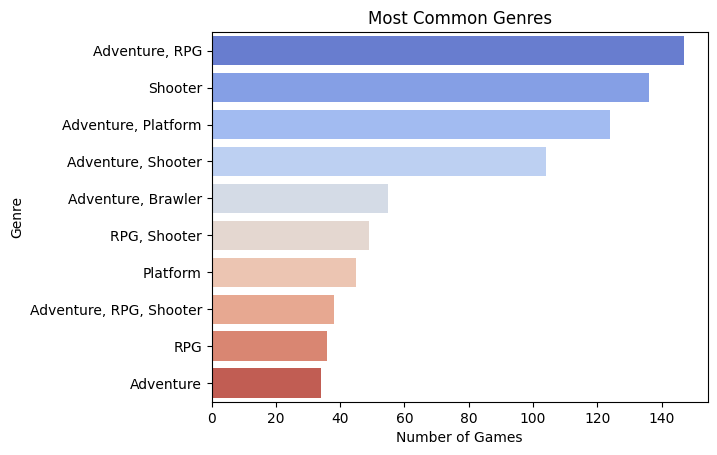

In [46]:
# Q3. Most common genres
q3 = merged['genres'].value_counts().head(10)

sns.barplot(x=q3.values, y=q3.index, palette='coolwarm')
plt.title("Most Common Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.show()

**🔥 Q16. Market evolution by platform**

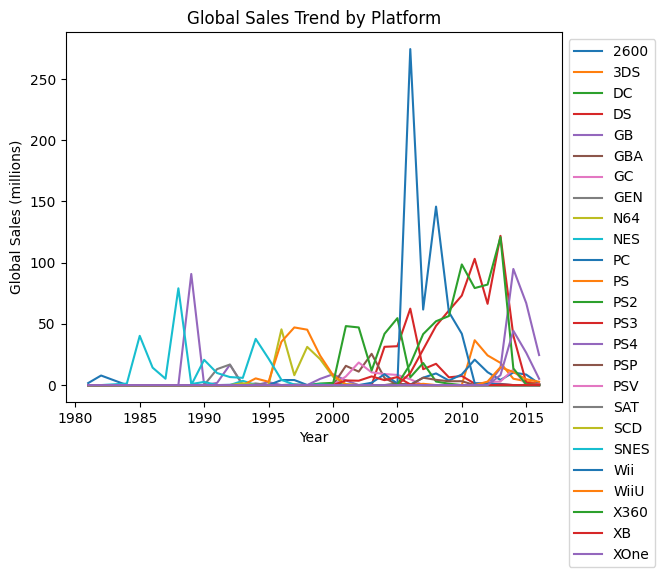

In [67]:
q16 = merged.groupby(['year', 'platform'])['global_sales'].sum().unstack().fillna(0)

q16.plot(kind='line')
plt.title("Global Sales Trend by Platform")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

**🧍 Q25. Wishlist vs Global Sales (Correlation)**

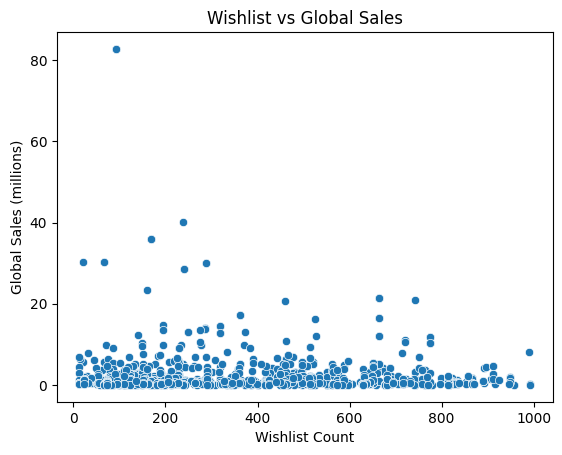

Correlation:
               wishlist  global_sales
wishlist      1.000000     -0.061435
global_sales -0.061435      1.000000


In [68]:
sns.scatterplot(data=merged, x='wishlist', y='global_sales')
plt.title("Wishlist vs Global Sales")
plt.xlabel("Wishlist Count")
plt.ylabel("Global Sales (millions)")
plt.show()

# Optional: correlation value
print("Correlation:\n", merged[['wishlist', 'global_sales']].corr())

***✅ Top 6 Most Important Questions to Explain to a Client (With Step-by-Step Python + Seaborn/Matplotlib)***
# **Business** goals: sales, trends, audience behavior, and product performance.

**1 Q14: Top 10 Best-Selling Games Globally**
Why: Shows what products are performing best across all markets.

<ipython-input-61-6ddc015dbdcc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='title', x='global_sales', palette='crest')


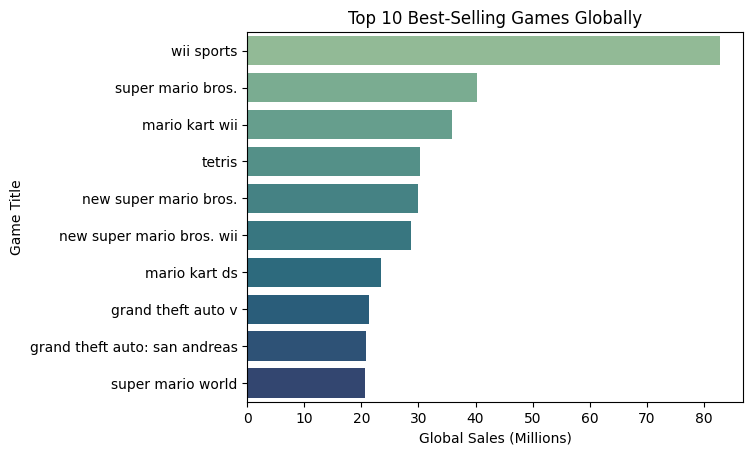

In [61]:
top10 = merged[['title', 'global_sales']].drop_duplicates().sort_values(by='global_sales', ascending=False).head(10)

sns.barplot(data=top10, y='title', x='global_sales', palette='crest')
plt.title("Top 10 Best-Selling Games Globally")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Title")
plt.show()

**🌍 2. Q10: Which Region Generates the Most Game Sales
Why: Tells client where the revenue comes from — helps target regions.**

<ipython-input-62-449ba87602f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q10.index, y=q10.values, palette='pastel')


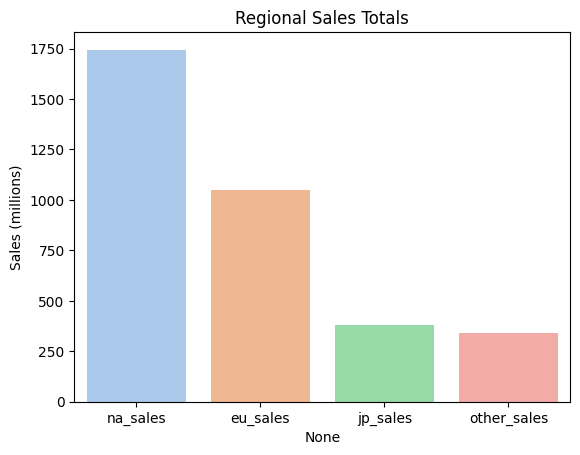

In [62]:
q10 = merged[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

sns.barplot(x=q10.index, y=q10.values, palette='pastel')
plt.title("Regional Sales Totals")
plt.ylabel("Sales (millions)")
plt.show()

**📈 3. Q12: Sales Trend Over Years
Why: Shows market growth or decline — helps in forecasting.**

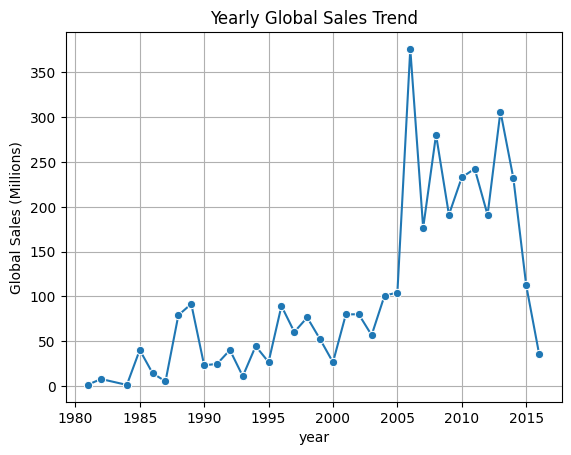

In [64]:
sales_trend = merged.groupby('year')['global_sales'].sum().reset_index()

sns.lineplot(data=sales_trend, x='year', y='global_sales', marker='o')
plt.title("Yearly Global Sales Trend")
plt.ylabel("Global Sales (Millions)")
plt.grid(True)
plt.show()

**🧩 4. Q11: Best-Selling Platforms
Why: Shows what consoles/platforms are most profitable.**

<ipython-input-66-afa2fb122c89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sales, x='global_sales', y='genre', palette='viridis')


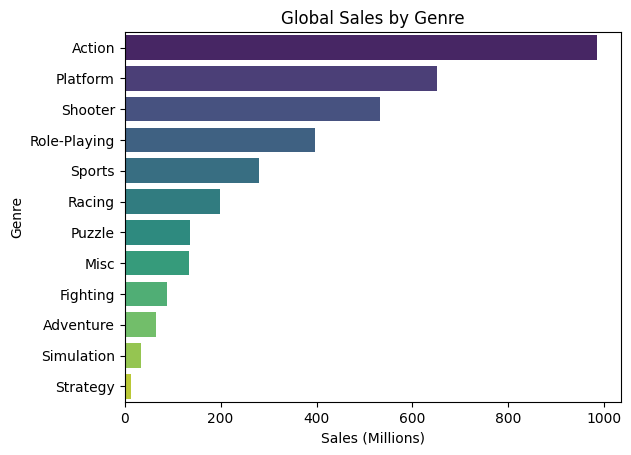

In [66]:
genre_sales = merged.groupby('genre')['global_sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data=genre_sales, x='global_sales', y='genre', palette='viridis')
plt.title("Global Sales by Genre")
plt.xlabel("Sales (Millions)")
plt.ylabel("Genre")
plt.show()

**🎮 5. Q21: Game Genres With Most Sales
Why: Helps decide which genres to invest in (marketing & development).**


<ipython-input-70-afa2fb122c89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sales, x='global_sales', y='genre', palette='viridis')


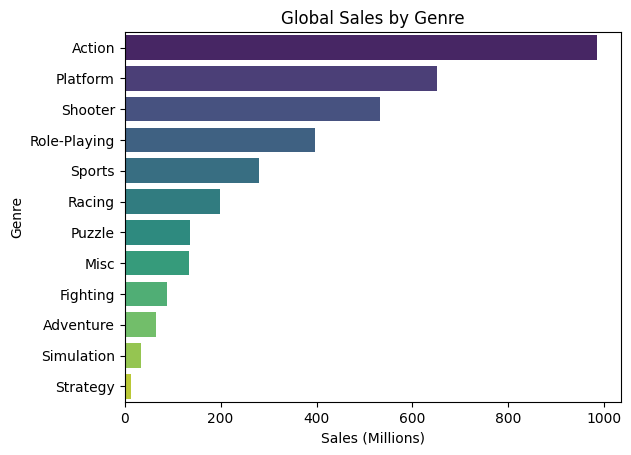

In [70]:
genre_sales = merged.groupby('genre')['global_sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data=genre_sales, x='global_sales', y='genre', palette='viridis')
plt.title("Global Sales by Genre")
plt.xlabel("Sales (Millions)")
plt.ylabel("Genre")
plt.show()

**📍 6. Q30: Regional Sales Heatmap by Genre
Why: Shows which genres are popular in which regions — great for targeted marketing.**

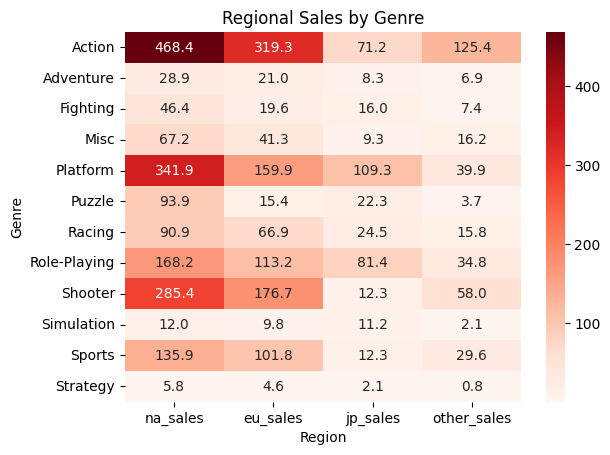

In [73]:
q30 = merged.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

sns.heatmap(q30, annot=True, fmt=".1f", cmap='Reds')
plt.title("Regional Sales by Genre")
plt.xlabel("Region")
plt.ylabel("Genre")
plt.show()

ALL 30 QUESTION IN PYTHON

In [44]:
# Convert 'wishlist', 'backlogs', and 'plays' to numeric, coercing errors
merged['wishlist'] = pd.to_numeric(merged['wishlist'], errors='coerce')
merged['backlogs'] = pd.to_numeric(merged['backlogs'], errors='coerce')
merged['plays'] = pd.to_numeric(merged['plays'], errors='coerce')


# Add 'Engagement' column (used in multiple questions)
merged['Engagement'] = merged['plays'] + merged['wishlist']

# 1. Top-rated games
print("1. Top-rated games")
print(merged[['title', 'rating']].drop_duplicates().sort_values(by='rating', ascending=False).head(10))

# 2. Developers with highest average ratings
print("\n2. Top developers by average rating")
print(merged.groupby('team')['rating'].mean().sort_values(ascending=False).head(10))

# 3. Most common genres
print("\n3. Most common genres")
print(merged['genres'].value_counts().head(10))

# 4. Games with highest backlog-to-wishlist ratio
print("\n4. Games with highest backlog-to-wishlist ratio")
bw = merged[merged['wishlist'] > 0].copy()
bw['Ratio'] = bw['backlogs'] / bw['wishlist']
print(bw[['title', 'backlogs', 'wishlist', 'Ratio']].sort_values('Ratio', ascending=False).head(10))

# 5. Game release trend by year
print("\n5. Game release trend over years")
merged['release_year'] = pd.to_datetime(merged['release_date'], errors='coerce').dt.year
print(merged['release_year'].value_counts().sort_index())

# 6. Distribution of user ratings
print("\n6. Distribution of user ratings")
print(merged['rating'].describe())

# 7. Top 10 most wishlisted games
print("\n7. Top 10 most wishlisted games")
print(merged[['title', 'wishlist']].drop_duplicates().sort_values(by='wishlist', ascending=False).head(10))

# 8. Avg plays per genre
print("\n8. Avg plays per genre")
print(merged.groupby('genres')['plays'].mean().sort_values(ascending=False).head(10))

# 9. Most productive and impactful developers
print("\n9. Most productive developers")
print(merged.groupby('team').agg({'title':'count','rating':'mean'}).rename(columns={'title':'Game_Count'}).sort_values('Game_Count', ascending=False).head(10))

# 10. Region with most sales
print("\n10. Regional sales totals")
print(merged[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum())

# 11. Best-selling platforms
print("\n11. Best-selling platforms")
print(merged.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(10))

# 12. Game releases and sales over years
print("\n12. Game release & sales trend")
print(merged.groupby('year')['global_sales'].sum())

# 13. Top publishers by sales
print("\n13. Top publishers by global sales")
print(merged.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(10))

# 14. Top 10 best-sellers globally
print("\n14. Top 10 best-selling games globally")
print(merged[['title', 'global_sales']].sort_values(by='global_sales', ascending=False).head(10))

# 15. Regional sales by platform
print("\n15. Regional sales by platform")
print(merged.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum())

# 16. Market evolution by platform
print("\n16. Sales trend over time by platform")
print(merged.groupby(['year', 'platform'])['global_sales'].sum().unstack().fillna(0).head())

# 17. Regional genre preferences
print("\n17. Regional genre preferences")
print(merged.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum())

# 18. Yearly sales change per region
print("\n18. Yearly sales change per region")
print(merged.groupby('year')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().diff())

# 19. Avg sales per publisher
print("\n19. Avg sales per publisher")
print(merged.groupby('publisher')['global_sales'].mean().sort_values(ascending=False).head(10))

# 20. Top 5 games per platform
print("\n20. Top 5 best-selling games per platform")
top5 = merged.sort_values('global_sales', ascending=False).groupby('platform').head(5)
print(top5[['title', 'platform', 'global_sales']])

# 21. Genres with highest global sales
print("\n21. Genres with highest global sales")
print(merged.groupby('genre')['global_sales'].sum().sort_values(ascending=False))

# 22. Correlation between rating and sales
print("\n22. Correlation between Rating and Global Sales")
print(merged[['rating', 'global_sales']].corr())

# 23. Platforms with high-rated games (>4)
print("\n23. Platforms with games rated above 4")
print(merged[merged['rating'] > 4].groupby('platform')['title'].count().sort_values(ascending=False))

# 24. Releases and sales over time
print("\n24. Releases and global sales trend")
print(merged.groupby('year')['global_sales'].sum())

# 25. Wishlist correlation with sales
print("\n25. Correlation: Wishlist vs Global Sales")
print(merged[['wishlist', 'global_sales']].corr())

# 26. Genres with high engagement but low sales
print("\n26. Genres with high engagement but low sales")
g = merged.groupby('genre')[['Engagement', 'global_sales']].mean()
g['ratio'] = g['Engagement'] / (g['global_sales'] + 1)
print(g.sort_values(by='ratio', ascending=False).head(10))

# 27. Correlation: Wishlist/Backlog vs Ratings
print("\n27. Correlation: Wishlist/Backlogs with Rating")
print(merged[['wishlist', 'backlogs', 'rating']].corr())

# 28. Avg user engagement per genre
print("\n28. Avg user engagement per genre")
print(merged.groupby('genre')['Engagement'].mean().sort_values(ascending=False).head(10))

# 29. Top performing Genre + Platform combos
print("\n29. Top performing Genre + Platform combos")
print(merged.groupby(['genre', 'platform'])['global_sales'].sum().sort_values(ascending=False).head(10))

# 30. Regional sales heatmap by genre
print("\n30. Regional sales heatmap by genre")
print(merged.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum())

1. Top-rated games
                                   title  rating
933      metal gear solid 3: subsistence     4.6
1291      silent hill 2: restless dreams     4.5
94                              mother 3     4.5
54                        chrono trigger     4.5
120      metal gear solid 3: snake eater     4.5
36                         silent hill 2     4.5
10                            bloodborne     4.5
60    castlevania: symphony of the night     4.4
111               shadow of the colossus     4.4
1018                      chrono trigger     4.4

2. Top developers by average rating
team
Team Silent, Konami                                   4.500000
Konami Computer Entertainment Japan, Konami           4.500000
FromSoftware, Sony Computer Entertainment             4.500000
Sony Computer Entertainment, Inc. (SCEI), Team Ico    4.400000
Konami, Konami Computer Entertainment Tokyo           4.400000
Aspyr Media, Ion Storm                                4.400000
Valve, Electronic Arts